In [26]:
import os
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
files = os.listdir("crop_part1")

In [3]:
data = {"FileName" : files}
df_info = pd.DataFrame(data=data)

In [11]:
df_info['Age'] = df_info.FileName.apply(lambda x : int(x.split('_')[0]))
df_info['Gender'] = df_info.FileName.apply(lambda x : 'Male' if 0 == int(x.split('_')[1]) else 'Female')
df_info['Race'] = df_info.FileName.apply(lambda x :x.split('_')[2] if len(x.split('_')[2]) == 1 else  None)
df_info['DateTime'] = df_info.FileName.apply(lambda x :datetime.strptime(x.split('_')[-1].split('.')[0][:12],'%Y%m%d%H%M%S'))

In [12]:
df_info.to_csv('ImageInfo.csv')

In [13]:
df_info.head()

,FileName,Age,Gender,Race,DateTime
1,100_1_0_20170110183726390.jpg.chip.jpg,100,Female,0,2017-01-10 18:03:07
2,100_1_2_20170105174847679.jpg.chip.jpg,100,Female,2,2017-01-05 17:04:08
3,101_1_2_20170105174739309.jpg.chip.jpg,101,Female,2,2017-01-05 17:04:07
4,10_0_0_20161220222308131.jpg.chip.jpg,10,Male,0,2016-12-20 22:02:03
5,10_0_0_20170103200329407.jpg.chip.jpg,10,Male,0,2017-01-03 20:00:03


### metrics function

In [15]:
def update_dataframe_with_clusters(cluster):
    df_info['cluster'] = 0
    for key in cluster:
        df_info.loc[df_info.FileName.isin(test_dict[key]), 'cluster'] = key

In [16]:
test_dict = {'c1' : list(df_info.FileName[:-100]), 
'c2' : list(df_info.FileName[:100])}

In [22]:
update_dataframe_with_clusters(test_dict)

Bar plot for ages for each cluster

<AxesSubplot:title={'center':'Age'}, xlabel='[cluster]'>

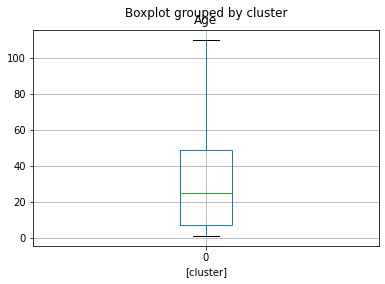

In [23]:
df_info.boxplot(column=['Age'], by=['cluster'])

Bar plot for genders for each found cluster

In [24]:
df_gender_cluster = df_info.groupby(['cluster', 'Gender'])['Gender'].size().reset_index(name='counts')

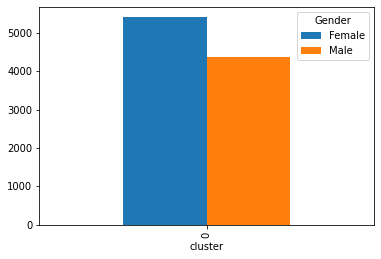

In [25]:
_  = pd.crosstab(df_info['cluster'],df_info['Gender']).plot.bar()

Bar plot for race for each found cluster

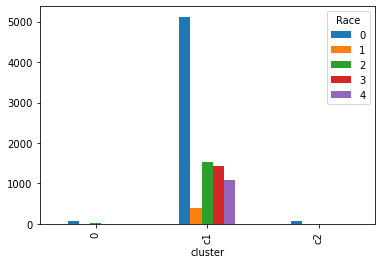

In [200]:
_  = pd.crosstab(df_info['cluster'],df_info['Race']).plot.bar()